In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5

In [30]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [31]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
960/960 [==============================] - 9s 9ms/step - loss: 1.5140 - accuracy: 0.4587
Epoch 2/5
960/960 [==============================] - 9s 9ms/step - loss: 1.0960 - accuracy: 0.6119
Epoch 3/5
960/960 [==============================] - 9s 9ms/step - loss: 0.9430 - accuracy: 0.6679
Epoch 4/5
960/960 [==============================] - 9s 9ms/step - loss: 0.8289 - accuracy: 0.7085
Epoch 5/5
960/960 [==============================] - 9s 9ms/step - loss: 0.7249 - accuracy: 0.7460
Score for fold 1: loss of 0.8664330840110779; accuracy of 70.11666893959045%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
960/960 [==============================] - 9s 9ms/step - loss: 1.5180 - accuracy: 0.4473
Epoch 2/5
960/960 [==============================] - 9s 9ms/step - loss: 1.1497 - accuracy: 0.5885
Epoch 3/5
960/960 [=================

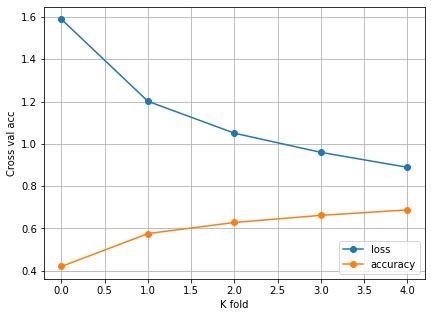

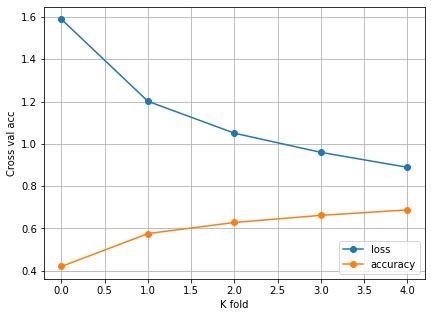

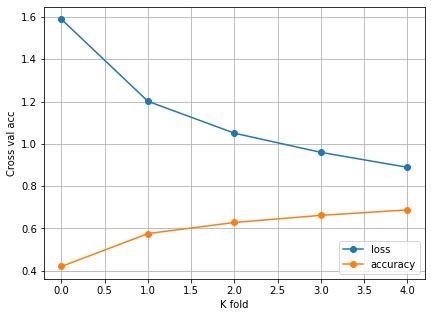

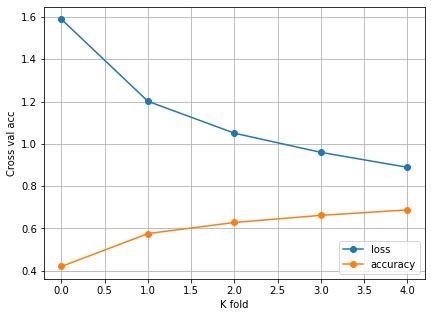

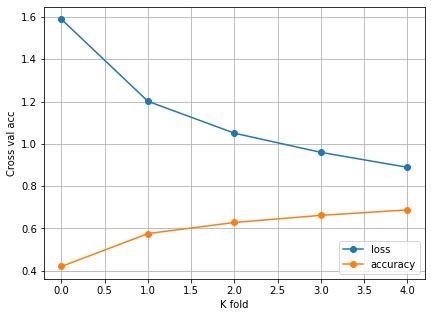

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.50500082969666 (+- 1.5409113947831428)
> Loss: 0.9336042761802673
------------------------------------------------------------------------


In [32]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')


for i in range(0, len(acc_per_fold)):
    
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
   
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'o-', label='loss')
    plt.plot(history.history['accuracy'], 'o-', label='accuracy')
    plt.xlabel('K fold')
    plt.ylabel('Cross val acc')
    plt.grid(True)
    plt.legend(loc='lower right')
plt.show()

print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

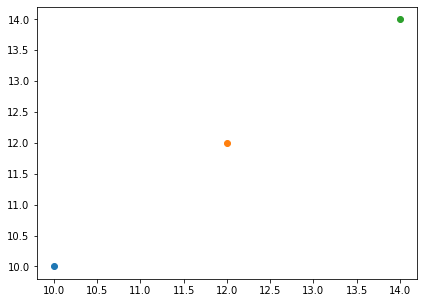

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x = 10
y = 10
plt.plot(x,y,'o-')
plt.plot(x+2,y+2,'o-')
plt.plot(x+4,y+4,'o-')
